# **Python für Ingenieure**
<!-- Lizensiert unter (CC BY 2.0) Gert Herold, 2020 -->

## 6.2. Übungsaufgaben für Arrays

Zunächst führen wir ein paar Imports von Funktionen durch, die wir im weiteren Verlauf gebrauchen können:

In [103]:
%matplotlib inline
# ^ matplotlib inline: Jupyter Lab: Plots direkt im Notebook anzeigen

from numpy import array, sin, cos, pi, dot, linspace, arange, newaxis, mean
from numpy.random import randn
from matplotlib.pyplot import figure, plot, axis, grid, imshow, show, legend

### 6.2.1. Koordinatentransformation

Die Koordinaten einer Vektorgrafik seien als 2D-Array gegeben (1. Zeile: x-Werte, 2. Zeile: y-Werte):

In [104]:
coords = array([[-0.8, -0.8,  0.8,  0.8, -0.8,  0.8, 0., -0.3, -0.3, -0.5, -0.5, -0.8,  0.8],
                [-1. ,  1. ,  1. , -1. , -1. ,  1. , 2.,  1.6,  1.8,  1.8,  1.4,  1. , -1. ]])

 * **Plotten Sie zunächst die untransformierte die Grafik in eine Abbildung.**
 * **Spiegeln Sie die Grafik an der x-Achse, vergrößeren Sie die Längenabmaße um 50 % und verschieben Sie die Koordinaten um 3 nach rechts (positive x-Richtung).** 
 * **Plotten Sie das Ergebnis in die gleiche Abbildung.**

Hinweis: Einfache 2D-Plots lassen sich mithilfe der [*plot()*](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html)-Funktion aus dem Modul [matplotlib](https://matplotlib.org/) realisieren: `plot(x_werte, y_werte)`.

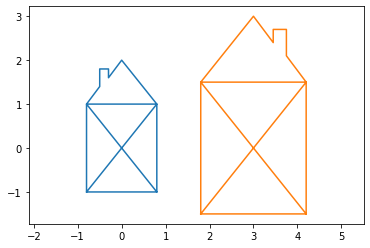

In [105]:
# Hier eigenen Code schreiben ...
plot(coords[0,:],coords[1,:])
plot((-1.5*coords[0,:])+3,1.5*coords[1,:])

# Achsen gleich-skalieren und Abbildung ausgeben
axis('equal')
show()

Im nächsten Schritt soll das Objekt rotiert werden. 
Die Rotation von Koordinaten in 2D lässt sich mithilfe folgender Matrix realisieren:
$$
R(\alpha) = \begin{pmatrix} \cos\alpha & -\sin\alpha \\ \sin\alpha & \cos\alpha\end{pmatrix}
$$
Hiermit lässt sich Vektors $\vec{x}$ um den Winkel $\alpha$ rotieren:
$$
\vec{x}_\text{rot} = R(\alpha) \cdot \vec{x}
$$

  * **Schreiben Sie eine Funktion, die ein Koordinatenarray und einen Winkel in Grad übergeben bekommt, und ein um den Winkel rotiertes Array zurückgibt.**
  * **Plotten Sie die rotierte Grafik anschließend für Winkel zwischen 0° und 30° in 5°-Schritten in eine Abbildung.**
  * **Fügen Sie eine Legende hinzu, aus der ersichtlich wird, welche Plotfarbe welchem Winkel entspricht.**

Hinweise: 
  * Um mit NumPy eine Matrixmultiplikation $A\cdot B$ zu realisieren, kann die *dot()*-Funktion verwendet werden: `dot(A, B)`. Ab Python 3.5 kann auch der *@*-Operator verwendet werden: `A @ B`.
  * Beachten Sie, dass die NumPy-Funktionen [*sin()*](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sin.html) und [*cos()*](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cos.html) in rad rechnen.
  * Legenden lassen sich in der Abbildung mithilfe der [*legend()*](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html)-Funktion hinzufügen. Die Labels können entweder als Parameter an diese Funktion übergeben werden oder direkt in den Plots definiert werden: `plot(x_werte, y_werte, label = 'irgendein_string')`.

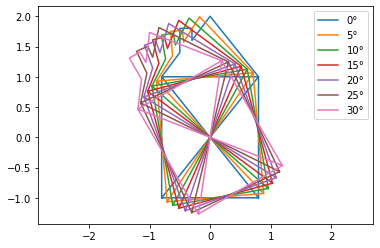

In [106]:
# Hier eigenen Code schreiben ...
def rotate_coord_array(coord_array, angle):
    coord_array = coord_array.copy()
    a = angle/180*pi
    rot_mat = array([[cos(a), -sin(a)],[sin(a), cos(a)]])
    for i in range(len(coord_array[0,:])):
        coord_array[:,i] = dot(rot_mat,coord_array[:,i])
    return coord_array

for angle in [i*5 for i in range(7)]:
    rot_coords=rotate_coord_array(coords, angle)
    plot(rot_coords[0,:],rot_coords[1,:], label=(str(angle) + '°'))

# Achsen gleich-skalieren, Legende hinzufügen und Abbildung ausgeben

axis('equal')
legend()
show()

In [107]:
a = array([[11,12,13],[21,22,23]])
b = array([[2],[1]])
a[:,0]


array([11, 21])

### 6.2.2. Das große Ein-mal-Eins

**Berechnen Sie die Produkte aller ganzen Zahlen von 1 bis 20 und speichern Sie diese in einem 2D-Array:**

|[]()|||||
|-----|---|----|----|-----|
| 1   | 2 | 3  | 4  | ... |
| 2   | 4 | 6  | 8  | ... |
| 3   | 6 | 9  | 12 | ... |
| 4   | 8 | 12 | 16 | ... |
| ... |...|... |... | ... |

Hinweis: Die NumPy-Funktion [*arange()*](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html) arbeitet ähnlich wie *range*, gibt aber direkt ein Array zurück.

In [108]:

one_times_one = [[i*j for i in range(1,21)] for j in range(1,21)]

In [109]:
a = arange(1,21)[newaxis,:]
b = arange(1,21)[:,newaxis]
c = dot(b,a)

**Invertieren Sie die Reihenfolge der Einträge der Hauptdiagonale der Matrix.**

In [206]:
# Hier eigenen Code schreiben ...
arr_size = min(c.shape)//2
for i in range(arr_size):
    c[i][i],c[19-i][19-i] = c[19-i][19-i],c[i][i]

**Visualisieren Sie das resultierende Array mit Matplotlibs [*imshow()*](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imshow.html).**

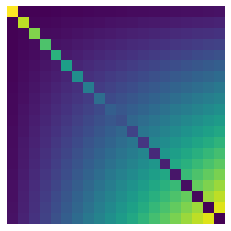

In [207]:
# Hier eigenen Code schreiben ...
imshow(c)

# Achsenbeschriftung deaktivieren und Abbildung ausgeben
axis('off')
show()

### 6.2.3. Verrauschtes Signal

**Schreiben Sie eine Funktion *signal()*, die eine verrauschte Sinus-Kurve berechnet. Folgendes Interface soll abgebildet werden:**
  * **Parameter:**
      * samples_per_period: Anzahl der tatsächlichen berechneten Funktionswerte je Periode, Standardwert: 100
      * n_periods: Anzahl der Perioden, Standardwert: 1
      * sigma: Standardabweichung des normalverteilten Rauschens, das dem Sinussignal überlagert wird, Standardwert: 0.0
  * **Rückgabewerte: x, y**
      * x: x-Werte
      * y: Funktionswerte
      
Hinweise:
  * Mit der Funktion [*linspace()*](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) lässt sich ein Array mit einer vorgebenen Anzahl an Stützstelle in einem Intervall erzeugen.
  * Ein Array mit [normalverteilten](https://de.wikipedia.org/wiki/Normalverteilung) Zufallswerten lässt sich recht einfach mit der Funktion [*randn()*](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randn.html) aus dem Modul [*numpy.random*](https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.random.html) erzeugen. 
<!--reshape, sum-->

In [208]:
# Hier eigenen Code schreiben ...
def signal(samples_per_period=100, n_periods=1, sigma=None):
    x = linspace(0,samples_per_period*n_periods,samples_per_period*n_periods, endpoint=False)
    y = sin((2*pi/samples_per_period)*x)
    if sigma:
        y =y+sigma*randn(samples_per_period*n_periods)
    return x,y

Testen Sie die fertige Funktion mit folgendem Befehl (das vorangestellte `*` "entpackt" das Tupel, das die Funktion *signal()* zurückgibt, sodass der Plotbefehl zwei Parameter erhält):

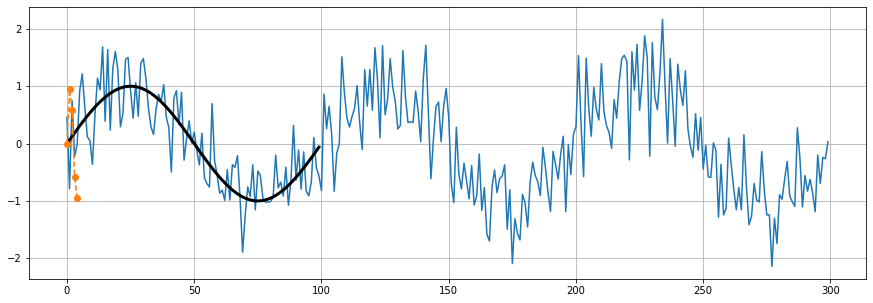

In [209]:
figure(1,(15,5))
plot(*signal(n_periods=3,sigma=0.5))
plot(*signal(), lw=3, c='k')
plot(*signal(5), '--o')
grid(True)
show()

**Erzeugen Sie ein verrauschtes Sinussignal (100 Werte pro Periode, $\sigma=0.5$), das 100 Perioden enthält.**
  * **Plotten Sie die ersten 100 Werte.**
  * **Sortieren Sie das Array mit den Signalwerten so um, dass Sie ein 2D-Array erhalten, dessen eine Achse jeweils eine Periode enthält und auf dessen anderer Achse die Periodenwiederholungen enthalten sind (siehe auch [*ndarray.reshape()*](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.reshape.html)).** 
  * **Bilden Sie den Mittelwert (z.B. über NumPys [*mean()*](https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html)) über die Periodenwiederholungen und plotten Sie das Ergebnis in dasselbe Diagramm.**
  * **Wiederholen Sie die Mittelwertbildung mit einem Array, das 10&#8239;000 Perioden enthält. Was ist zu beobachten?**

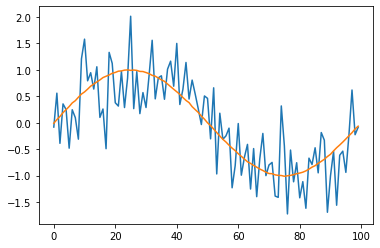

In [211]:
# Hier eigenen Code schreiben ...
spp = 100
np = 10000
sigma = 0.5
x,y = signal(spp, np, sigma)
plot(x[:spp],y[:spp])
y_res = y.reshape(np,-1)
plot(x[:100],mean(y_res,0))
show()

In [214]:
a =array([[[1,2,3],[1,2,3]],[[2,3,4],[2,3,4]],[[3,4,5],[3,4,5]]])
a, mean(a,0)

(array([[[1, 2, 3],
         [1, 2, 3]],
 
        [[2, 3, 4],
         [2, 3, 4]],
 
        [[3, 4, 5],
         [3, 4, 5]]]),
 array([[2., 3., 4.],
        [2., 3., 4.]]))